# The Bisection Method 

The details aren't covered here, but we know that this method continuously bisects an interval until an good approximation of the function root is found. 

As an exploratory example, 

In [52]:
import math
import numpy as np 
import matplotlib.pyplot as plt

In [53]:
a=0    # lower endpoint

In [54]:
b=math.pi/2    # upper endpoint 

In [55]:
# function to find root
def f(x):
    return (x - math.cos(x))

In [56]:
x = np.linspace(a, b, 100)    # generate vector of 100 evenly spaces points over interval

In [57]:
vf = np.vectorize(f)    # create a vectorized version of the function f

Text(0.42, -0.6, '$x_2=\\pi/8$')

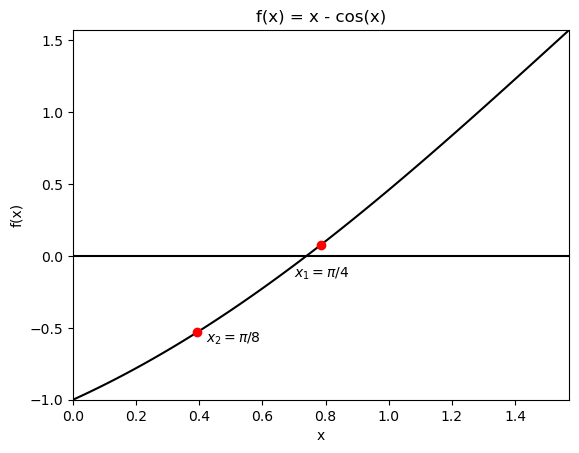

In [61]:
plt.plot(x, vf(x), 'k')    # plot function using vectorized function and vector of inputs, 'k' = black 
plt.title('f(x) = x - cos(x)')    # add title 
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot([a,b], [0,0], 'k')    # add horizontal line at 0 across interval since this is the releveant portion of the x-axis (our root lies here)
m=(a+b)/2    # compute mid-point of interval
plt.plot(m, f(m), 'ro')    # graph midpoint 
plt.text(0.7, -0.15, r'$x_1 = \pi/4$')    # add label to midpoint 
plt.axis([0, math.pi/2, -1, math.pi/2]);   # adjust axes to fit only interval

plt.plot(m2,f(m2),'ro')
plt.text(0.42, -0.6, r'$x_2=\pi/8$')

<br>From this graph, it is clear that over the given interval, $f$ changes signs. By the IVT, $\exists x \in (a,b) \ni f(x) = 0$.

Let's examine the current values of $f$ at $a$, $b$ and $m$,

In [39]:
f(a)

-1.0

In [40]:
f(b)

1.5707963267948966

In [41]:
f(m)

0.0782913822109007

<br>From these results, we can see that $m$ and $a$ have different signs. Again, by IVT, the root lies within this interval. We adjust the interval to this subinterval and then repeat the process until the root is found.

In [70]:
b = m    # adjust interval to left half 

In [71]:
f(a), f(b)    # new interval 

(-1.0, 0.0782913822109007)

In [75]:
m = (a+b)/2    # find new midpoint

In [76]:
m

0.39269908169872414

<br>We only care if the signs of the function evaluated at the endpoints are different. This means we can simply check this to see if $f(a)f(b) < 0$. $f(m)$ must have a different sign from exactly one of $f(a)$ or $f(b)$. 

In [73]:
f(a)*f(m)

0.5311804508125626

In [74]:
f(m)*f(b)

-0.04158685169752488

<br>The sign changed on $(m,b)$ so we need to shift the interval to the right. 

In [77]:
a = m 

In [78]:
m = (a+b)/2

<br>Of course this was just a small exploratory demonstration to show the general idea of this method. The *practical* implementation should be done with a function. There exist a few different ways to implement this algorithm. One has already been implemented. I like the one I have now, but of course it can be improved upon at a later time, at least from a software point of view. 

In [120]:
# The Bisection Method
def bisection(f, a, b, tol):
    ''' Function accepts as input a function f that implements f(x), the endpoints
    a and b of an interval [a,b], and an absolute error tolerance tol. The return 
    value niter is the number of iterations (number of times the midpoint is examined). 
    '''
    # TODO: Implement exception to make sure f does not change sign on the interval 
    if (f(a)*f(b)>0):
        raise ValueError("Error: f(x) does not change signs over given interval")
    counter = 0    # may need to be set to 1
    while True:
        m = (a+b)/2    # set midpoint of current interval 
        if (f(m)==0) or (b-a < (2*tol)):    # root found or error tolerance reached 
            x = m 
            niter = counter + 1
            return x, niter    # return approximation
        if f(a)*f(m) < 0:    # if f(a) and f(m) have different signs, shift left
            b = m
        else:
            a = m    # shift right 
        counter = counter + 1

In [121]:
# implement function 
def f(x):
    return (math.pow(x,3) + 4*math.pow(x,2) - 10)

In [122]:
x,niter = bisection(f, 1, 2, 0.0001)

In [123]:
# approximated root
x

1.36517333984375

In [124]:
# number of iterations 
niter

14

Thus, using the bisection method, our approximation for the root of $f$ converged to 1.36517333984375 after 14 iterations with an absolute error tolerance of 0.0001.

In [126]:
# test if Exception is working properly 
try:
    x,niter = bisection(f, 0, 1, 0.0001)
except ValueError as err:
    print(err)

Error: f(x) does not change signs over given interval


<br>The basic exception handling is working properly for this given function. It is up to the user to decided how they want to handle the exceptions at this point. 